# Reproducing Villena-Gonzalez CDA Study (2020) - Reference

## Notes:
- Choice of a Reference doesn't impact the CDA, since it's a substraction of 2 channels, which both gets equally affected by a re-refering.


In [2]:
import numpy as np
import glob
import pickle

import mne
from mne import Epochs, pick_channels, find_events
from mne.io import read_raw_bdf

import sys
sys.path.append('/Users/nick/Documents/PhD/CLCT/reprod/studies/Villena-Gonzalez-2019/')
from events import get_specific_events, get_epochs, get_CDA, prep_report, fill_report, get_report, checksum

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prep Data

Processing: CS230419.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Villena-Gonzalez 2019/Data/CS230419.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 796671  =      0.000 ...   389.000 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter pa

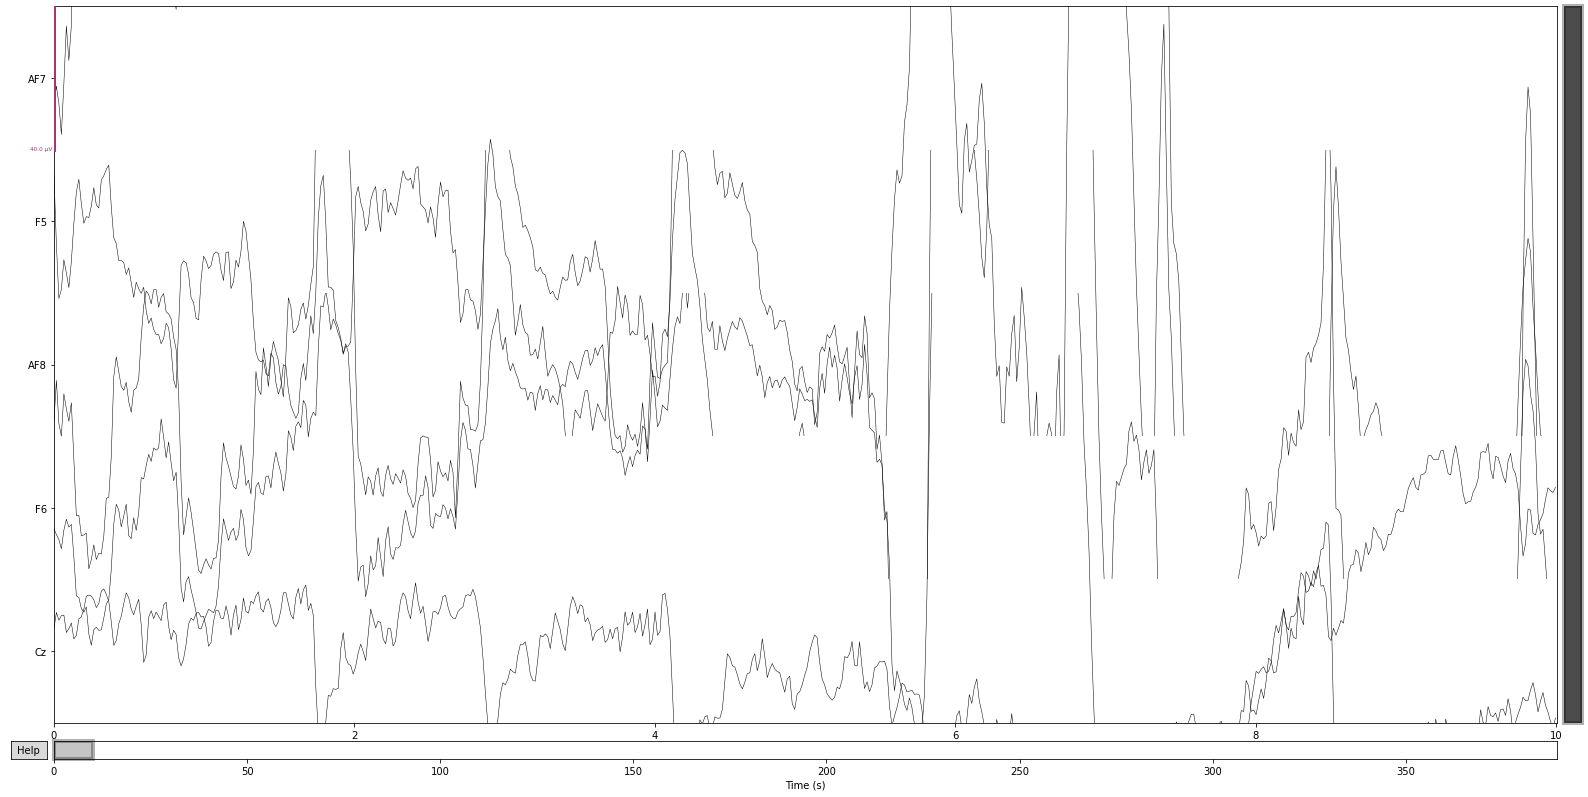

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

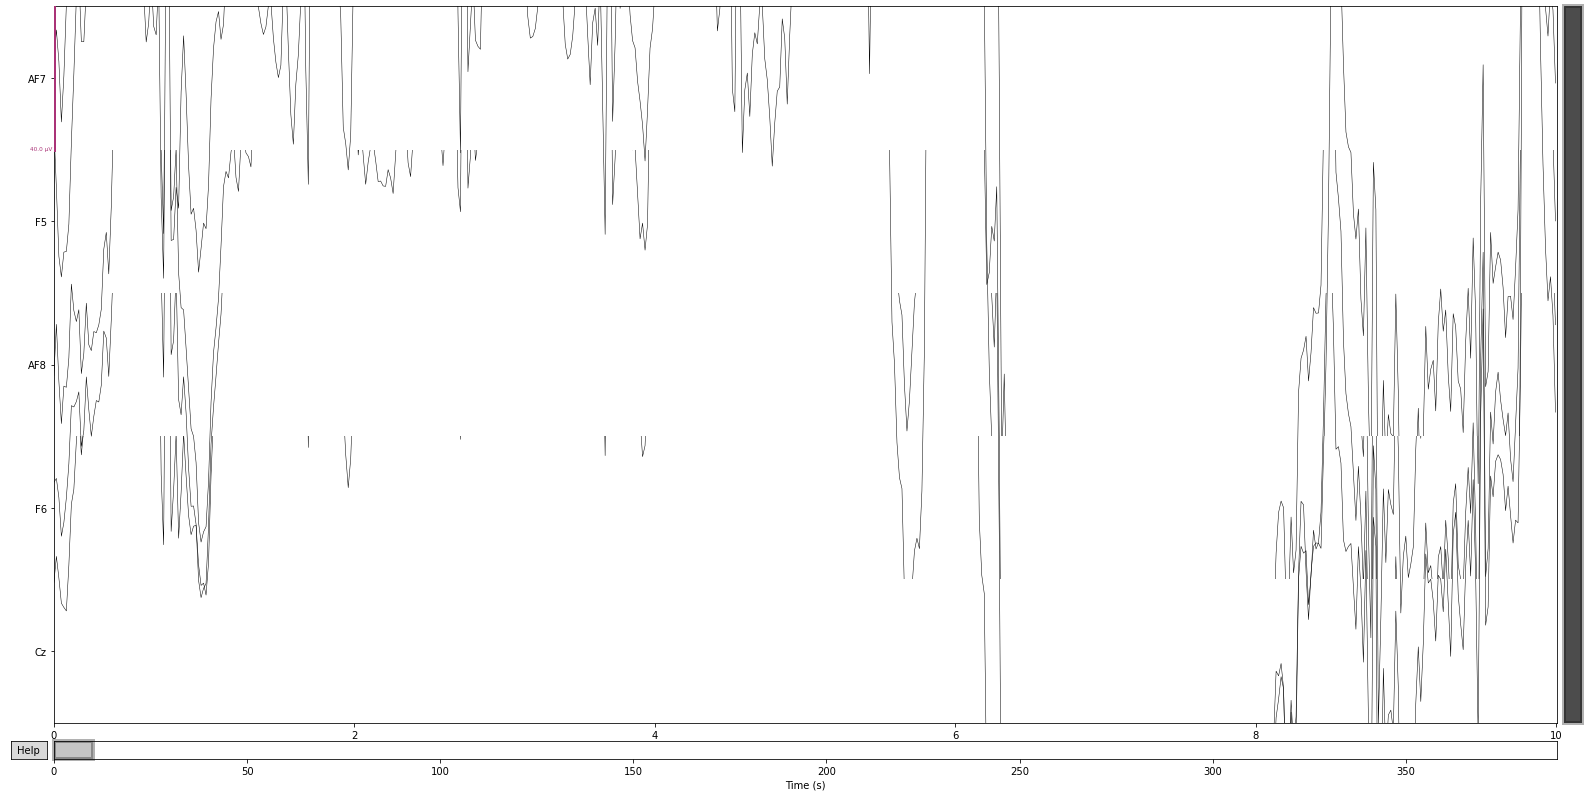

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

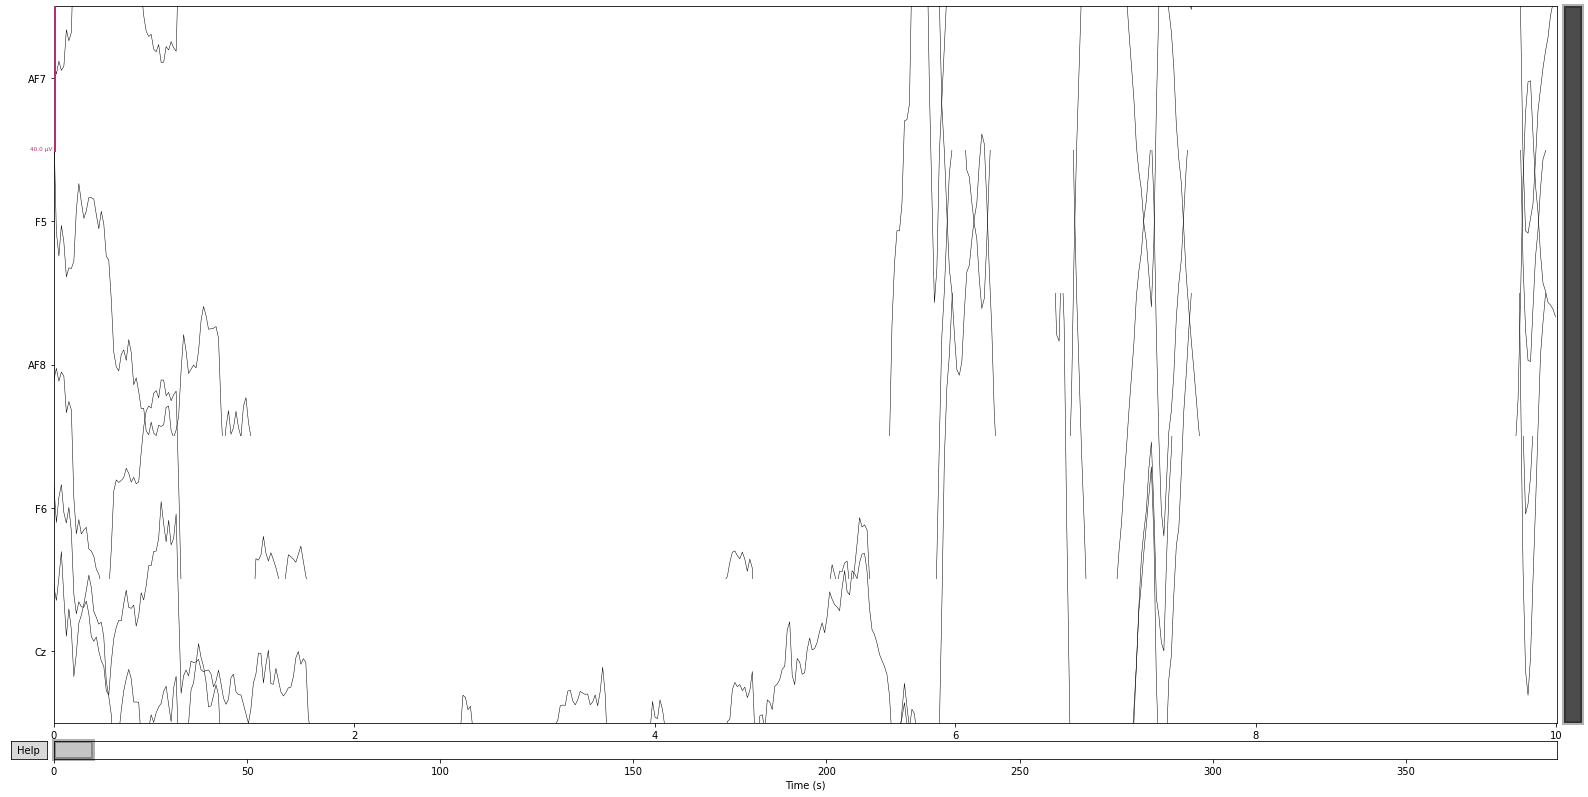

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.0

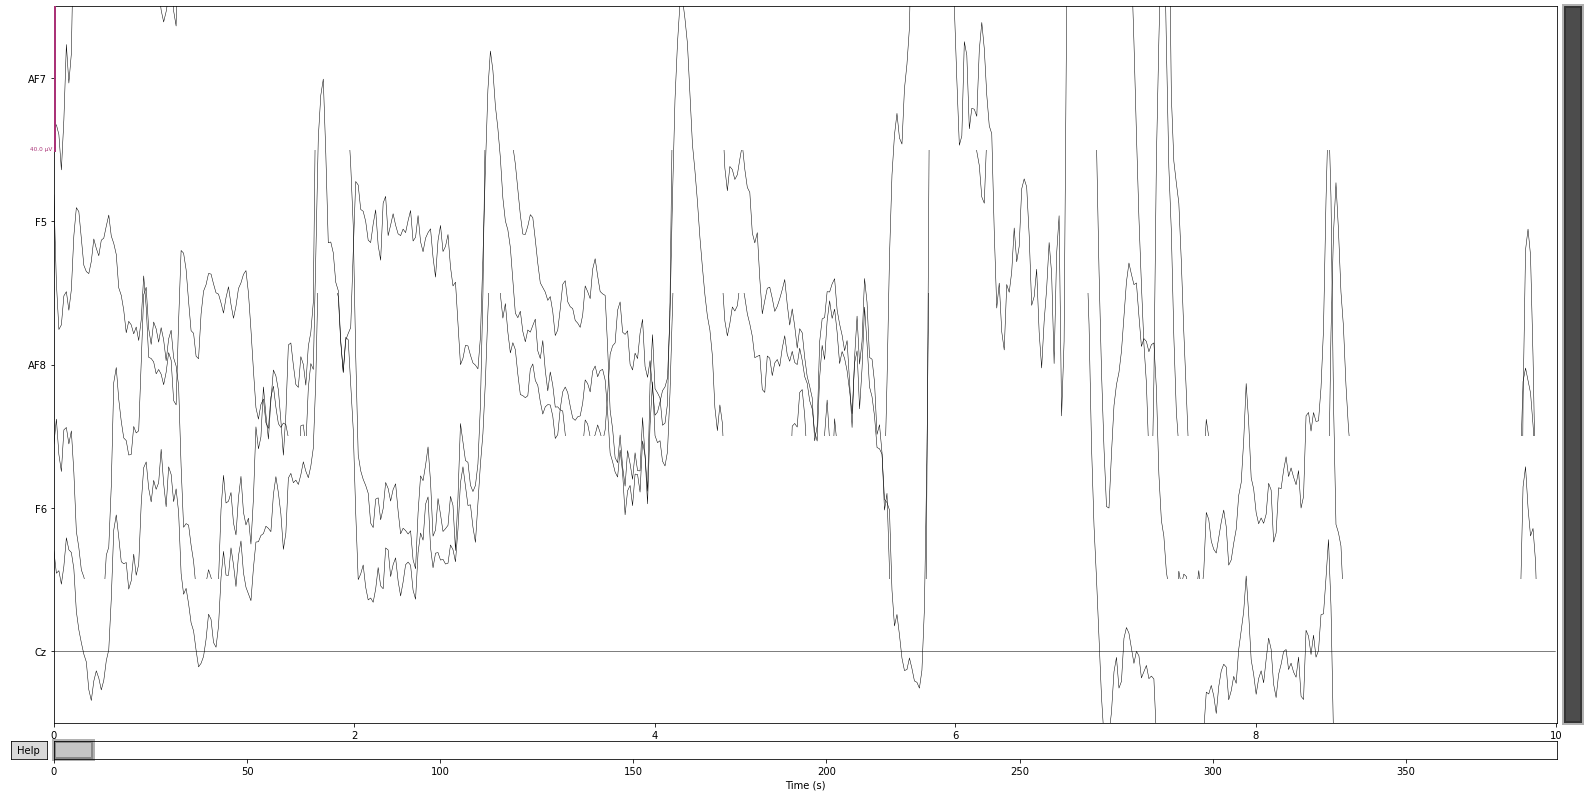

In [3]:
chan_refs = ['average', ['EXG7', 'EXG8'], ['AF8', 'AF7'], ['Cz']]

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
#directory_path = 'D:\\CLNT\\Data\\Open Datasets\\Villena-Gonzalez 2019\\Data\\'
directory_path = '/Users/nick/Documents/PhD/CDA Datasets/Villena-Gonzalez 2019/Data/'
sep = '/'

filepath = directory_path + 'CS230419.bdf'
#for filepath in glob.iglob(directory_path + '*.bdf'):
filename = filepath[filepath.rfind(sep)+1:]
print('Processing: ' + filename + '...')

# ------------------------
# 1. -- Load File --
# ------------------------
raw = read_raw_bdf(filepath, preload=True)

for ref in chan_refs:
    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    #raw = raw.drop_channels(ch_names=['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6'])
    #raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])
    #raw = raw.set_channel_types({'EXG7': 'misc', 'EXG8': 'misc'})

    preproc = raw.copy().set_eeg_reference(ref_channels=ref)

    # Set Electrodes Locations
    #montage = mne.channels.make_standard_montage('biosemi64')
    #raw.set_montage(montage)

    # Resample
    preproc = preproc.resample(1024)

    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = find_events(preproc)

    # Plot (visual check)
    preproc = preproc.pick_channels(['AF7', 'AF8', 'F5', 'F6', 'Cz'])
    preproc.plot(events=events, block=True, lowpass=40)

Processing: CS230419.bdf...
Extracting EDF parameters from /Users/nick/Documents/PhD/CDA Datasets/Villena-Gonzalez 2019/Data/CS230419.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 796671  =      0.000 ...   389.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Trigger channel has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
382 events found
Event IDs: [ 1 10 11 12 13 20 21 22 23 30 31 32 33 40 41 42 43 60 61]
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.1 - 20 Hz

FIR filter parameters
-------------------

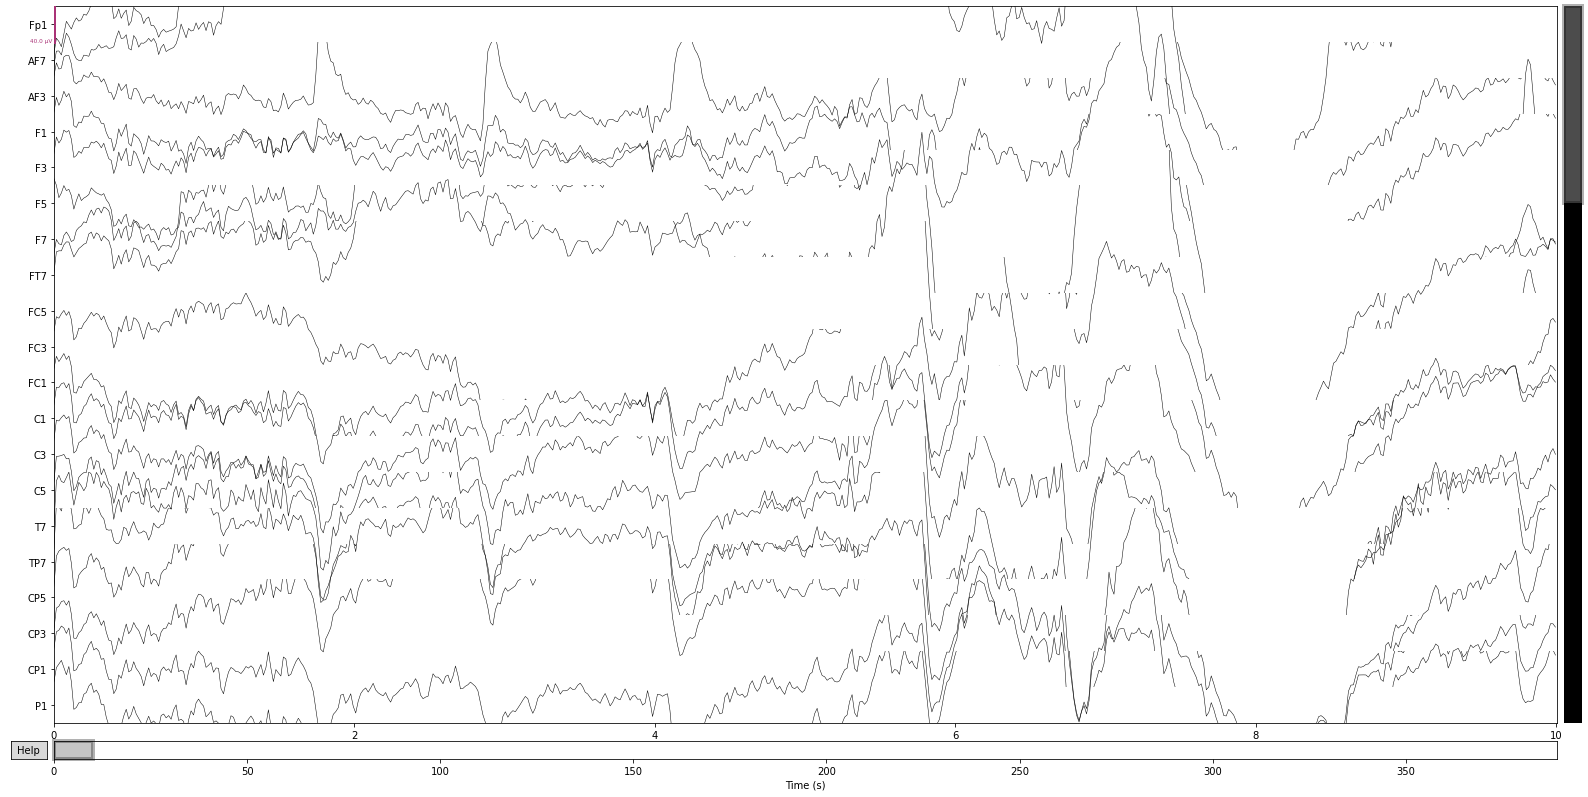

Overlapping Events with no Accuracy/Perf! Skipping...
Overlapping Events with no Accuracy/Perf! Skipping...
Total: 96 (2 Skipped do to overlapping events with missing triggers.)
====================== EPOCHING ======================
tmin:-0.2, tmax:2, baseline=(-0.2, 0)
---------- 1-left-good -------------
Not setting metadata
Not setting metadata
15 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 15 events and 2254 original time points ...
0 bad epochs dropped
---------- 1-left-bad -------------
Not setting metadata
Not setting metadata
1 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 1 events and 2254 original time points ...
0 bad epochs dropped
---------- 1-right-good -------------
Not setting metadata
Not setting metadata
16 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 16 events and 2254 origin

In [5]:
#==================================================================
# General Variables
#==================================================================
## Organize Triggers
triggers = dict();

# --------------------------
triggers['1'] = [10,11,12,13] 
triggers['2'] = [20,21,22,23]
triggers['4'] = [40,41,42,43]

triggers['left'] = [11,12,21,22,41,42]
triggers['right'] = [10,13,20,23,40,43]

triggers['good'] = [60]
triggers['bad'] = [61]

# Labels
conds = ['1', '2', '4']
sides = ['left', 'right']
perfs = ['good', 'bad']

# CDA Channels
chan_right = ['TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
chan_left =  ['TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1']
chan_refs = ['average', ['EXG7', 'EXG8'], ['AF8', 'AF7'], ['Cz']]

# Epoch information
epoch_length = 2
epoch_tmin = -0.2
baseline_corr = (-0.2, 0)

# CDA main variable!
cda_dict = dict()
epochs_all = dict()
report = prep_report(conds, sides, perfs)

#==================================================================
# Main Loop - Loading All Files & Extract CDAs.
#==================================================================
#directory_path = 'D:\\CLNT\\Data\\Open Datasets\\Villena-Gonzalez 2019\\Data\\'
directory_path = '/Users/nick/Documents/PhD/CDA Datasets/Villena-Gonzalez 2019/Data/'
sep = '/'

filepath = directory_path + 'CS230419.bdf'
#for filepath in glob.iglob(directory_path + '*.bdf'):
filename = filepath[filepath.rfind(sep)+1:]
print('Processing: ' + filename + '...')

cda_all_channels_all_refs = dict()
for ref in [['EXG1','EXG2']]: #chan_refs:

    # ------------------------
    # 1. -- Load File --
    # ------------------------
    raw = read_raw_bdf(filepath, preload=True)

    # ------------------------
    # 2. -- Preprocessing --
    # ------------------------
    # Keep only EEG channels and reference
    #raw = raw.rename_channels({'EXG7':'A1', 'EXG8': 'A2'})
    #raw = raw.drop_channels(ch_names=['EXG1','EXG2','EXG3','EXG4','EXG5','EXG6'])
    #raw = raw.set_eeg_reference(ref_channels=['EXG7', 'EXG8'])
    #raw = raw.set_channel_types({'EXG7': 'misc', 'EXG8': 'misc'})

    preproc = raw.copy().set_eeg_reference(ref_channels=ref)

    # Set Electrodes Locations
    #montage = mne.channels.make_standard_montage('biosemi64')
    #raw.set_montage(montage)

    # Resample
    preproc = preproc.resample(1024)

    # Filter
    preproc = preproc.filter(.1, 20., fir_design='firwin', skip_by_annotation='edge')

    # Events
    events = find_events(preproc)

    # Plot (visual check)
    preproc.plot(events=events, block=True, lowpass=40)

    # ------------------------
    # 3. -- Epochs --
    # ------------------------
    specific_events = get_specific_events(events, conds, sides, perfs, triggers)

    epochs_dict = get_epochs(preproc, specific_events, epoch_length, epoch_tmin, baseline_corr)

    epochs_all[filename] = epochs_dict

    # ------------------------
    # 4. - Report & Checksum -
    # ------------------------
    report = fill_report(report, filename, specific_events, epochs_dict)
    report.at[filename, 'checksum'] = checksum(specific_events, epochs_dict)

    times = epochs_dict['2']['left']['good'].times

    # ------------------------
    # 5. -- Get CDA --
    # ------------------------
    chan_left_all =  ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1']
    chan_right_all = ['Fp2', 'AF8', 'AF4', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']

    cda_dict = dict()
    cda_all_channels = dict()
    cda_all_channels_per_subj = dict()
    for f in epochs_all.keys():
        cda_all_channels_per_subj[f] = dict()
        for cond in conds:
            cda_all_channels[cond] = dict()
            cda_all_channels_per_subj[f][cond] = dict()
            for perf in perfs:
                cda_all_channels[cond][perf] = dict()
                cda_all_channels_per_subj[f][cond][perf] = dict()

    # Get CDA per Channel-Pair
    for i, ch in enumerate(chan_right_all):
        # Get CDA for a specific Channel-Pair for all Subjects
        for filename in epochs_all.keys():
            cda_dict[filename] = get_CDA(epochs_all[filename], conds, sides, perfs, [chan_right_all[i]], [chan_left_all[i]])

        # For each Cond-Perf get the CDA per Channel-Pair across Subjects
        cda_all = dict()
        for cond in cda_dict[list(cda_dict.keys())[0]].keys():
            cda_all[cond] = dict()

            for perf in ['good']: #perfs:
                cda_all[cond][perf] = dict()

                for f in cda_dict.keys():
                    ldict = cda_dict[f][cond]['left']
                    rdict = cda_dict[f][cond]['right']
                    if (perf in ldict.keys() and len(ldict[perf])) and (perf in rdict.keys() and len(rdict[perf])):
                        cda_dict_cur = (cda_dict[f][cond]['left'][perf] + cda_dict[f][cond]['right'][perf])/2
                        cda_all[cond][perf] = np.vstack([cda_all[cond][perf], cda_dict_cur]) if len(cda_all[cond][perf]) else cda_dict_cur
                        cda_all_channels_per_subj[f][cond][perf]["{}-{}".format(chan_left_all[i], chan_right_all[i])] = cda_dict_cur
                    else:
                        print("==== SKIPPED: 0 points! (File: {} - Cond: {} - Perf: {})".format(str(f), str(cond), perf))

                cda_all_channels[cond][perf]["{}-{}".format(chan_left_all[i], chan_right_all[i])] = cda_all[cond][perf] #.mean(0)

    cda_all_channels_all_refs[str(ref)] = cda_all_channels
    

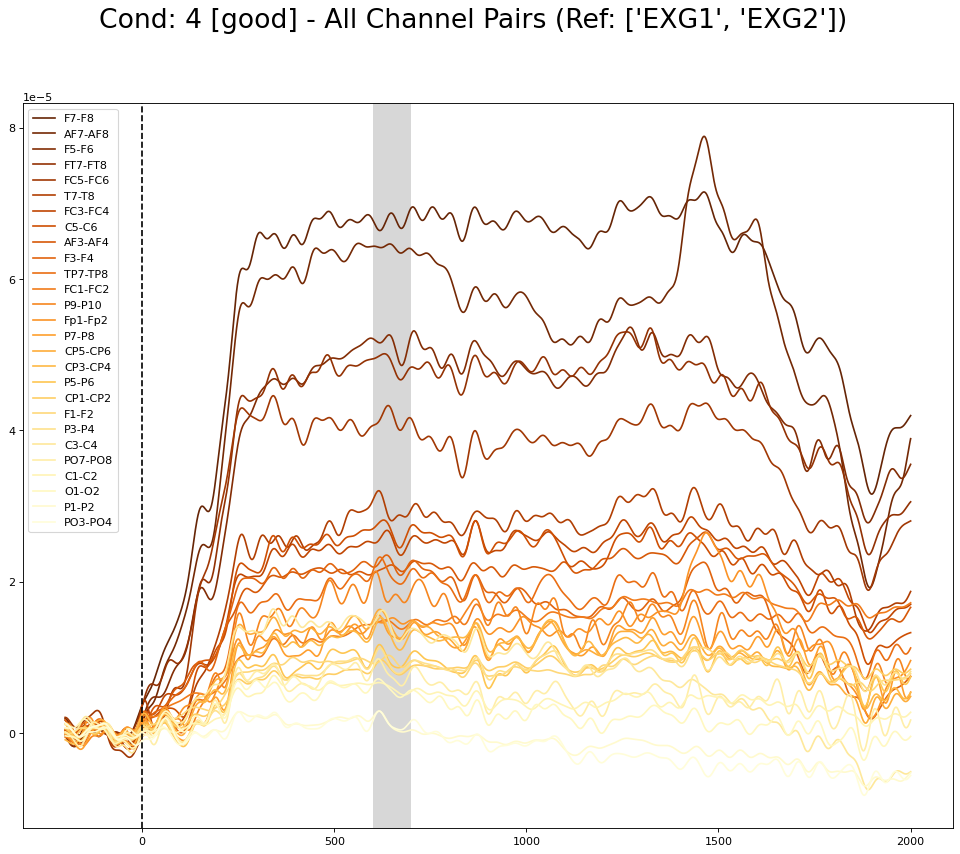

In [8]:
for ref in [['EXG1','EXG2']]:#chan_refs:
    cda_all_channels = cda_all_channels_all_refs[str(ref)]
    
    # ------------------------
    # 6. -- Plot CDA --
    # ------------------------
    cmap = matplotlib.cm.get_cmap('YlOrBr')

    for perf in ['good']:#perfs:
        for cond in ['4']:#conds:
            plt.figure(figsize=(15, 12), dpi=80)
            plt.suptitle("Cond: {} [{}] - All Channel Pairs (Ref: {})".format(cond, perf, ref), fontsize=24)

            ch_pair_mean_amp = [cda_all_channels[cond][perf][x].mean(0) for x in cda_all_channels[cond][perf]]
            mean_list, cda_sorted = zip(*sorted(zip(ch_pair_mean_amp, cda_all_channels[cond][perf].items()), reverse=True))

            nb_pairs = len(cda_all_channels[cond][perf].keys())
            for i, ch_pair in enumerate(cda_all_channels[cond][perf].keys()):
                plt.plot((times * 1000), cda_sorted[i][1], label=cda_sorted[i][0], color=cmap(1-i/nb_pairs))

            plt.axvline(x=0, color='k', linestyle='--')
            plt.axvspan(600, 700, alpha=0.9, facecolor='lightgray')
            #plt.gca().invert_yaxis()
            plt.legend()
            plt.show()            

### 2.1 Plot CDA - All Channel Pairs (Group Level / All Subjects)

### Note:

In [ ]:
cmap = matplotlib.cm.get_cmap('YlOrBr')

for perf in ['good']:#perfs:
    for cond in conds:
        plt.figure(figsize=(15, 12), dpi=80)
        plt.suptitle("Cond: {} [{}] - All Channel Pairs".format(cond, perf), fontsize=24)

        ch_pair_mean_amp = [cda_all_channels[cond][perf][x].mean(0) for x in cda_all_channels[cond][perf]]
        mean_list, cda_sorted = zip(*sorted(zip(ch_pair_mean_amp, cda_all_channels[cond][perf].items()), reverse=True))

        nb_pairs = len(cda_all_channels[cond][perf].keys())
        for i, ch_pair in enumerate(cda_all_channels[cond][perf].keys()):
            plt.plot((times * 1000), cda_sorted[i][1], label=cda_sorted[i][0], color=cmap(1-i/nb_pairs))

        plt.axvline(x=0, color='k', linestyle='--')
        plt.axvspan(600, 700, alpha=0.9, facecolor='lightgray')
        #plt.gca().invert_yaxis()
        plt.legend()
        plt.show()

In [ ]:
preproc.reference

### 2.2 Plot CDA - All Channel Pairs (Subject Level / Per Subject)

### 3 Extra CDA - Midline

In [ ]:
chan_midline_all = ['Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz',  'AFz', 'Fz', 'FCz', 'Cz']

cda_midline_dict = dict()
cda_midline_channels = dict()
for cond in conds:
    cda_midline_channels[cond] = dict()
    for perf in perfs:
        cda_midline_channels[cond][perf] = dict()
    
for i, ch in enumerate(chan_midline_all):
    for file_name in epochs_all.keys():
        epochs_dict = epochs_all[file_name]
        cda_midline_dict[file_name] = dict()

        times = epochs_dict[conds[0]][sides[0]][perfs[0]].times

        for cur_cond in conds:
            cda_midline_dict[file_name][cur_cond] = dict()

            for cur_side in sides:
                cda_midline_dict[file_name][cur_cond][cur_side] = dict()

                for cur_perf in ['good']:#perfs:
                    if epochs_dict[cur_cond][cur_side][cur_perf] is not None:
                        epochs_midline = epochs_dict[cur_cond][cur_side][cur_perf].copy().pick_channels([chan_midline_all[i]])
                        evoked_midline = epochs_midline.average()
                        midline = evoked_midline.data.mean(0)

                        cda_midline_dict[file_name][cur_cond][cur_side][cur_perf] = midline
    
    cda_midline_all = dict()

    for cond in cda_midline_dict[list(cda_midline_dict.keys())[0]].keys():
        cda_midline_all[cond] = dict()
        
        for perf in ['good']: #perfs:
            cda_midline_all[cond][perf] = dict()

            for f in cda_dict.keys():
                if len(cda_midline_dict[f][cond]['left'][perf]) > 0:
                    cda_dict_cur = (cda_midline_dict[f][cond]['left'][perf] + cda_midline_dict[f][cond]['right'][perf])/2
                    cda_midline_all[cond][perf] = np.vstack([cda_midline_all[cond][perf], cda_dict_cur]) if len(cda_midline_all[cond][perf]) else cda_dict_cur
                else:
                    print("==== SKIPPED: 0 points! (File: {} - Cond: {} - Perf: {})".format(str(f), str(cond), perf))
        
            cda_midline_channels[cond][perf]["{}".format(chan_midline_all[i])] = cda_midline_all[cond][perf] #.mean(0)

# Plot
cmap = matplotlib.cm.get_cmap('YlOrBr')

for perf in ['good']:#perfs:
    for cond in conds:
        plt.figure(figsize=(15, 12), dpi=80)
        plt.suptitle("Cond: {} [{}] - All Channel Midline".format(cond, perf), fontsize=24)

        ch_pair_mean_amp = [cda_midline_channels[cond][perf][x].mean(0) for x in cda_midline_channels[cond][perf]]
        mean_list, cda_sorted = zip(*sorted(zip(ch_pair_mean_amp, cda_midline_channels[cond][perf].items()), reverse=True))

        nb_pairs = len(cda_midline_channels[cond][perf].keys())
        for i, ch_pair in enumerate(cda_midline_channels[cond][perf].keys()):
            plt.plot((times * 1000), cda_sorted[i][1], label=cda_sorted[i][0], color=cmap(1-i/nb_pairs))

        plt.axvline(x=0, color='k', linestyle='--')
        #plt.gca().invert_yaxis()
        plt.legend()
        plt.show()
        #plt.savefig("./img/Villena-2019-Channels-Midline-{}-{}.jpg".format(cond, perf), dpi=300)
